   ### Problem Description
            A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:
        • Which variables are significant in predicting the price of a car
        • How well those variables describe the price of a car
    Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.
    
   ### Business Goal
        You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Acquire Dataset

In [2]:
df = pd.read_csv("Carprice_Assignment.csv")

In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Data Exploration

In [4]:
df.shape

(205, 26)

In [5]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### Data Cleaning and Preprocessing

In [10]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [11]:
df['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2])

In [12]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [13]:
df.CarName.value_counts()

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64

In [14]:
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [15]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [16]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [17]:
# Here the door number is a numerical columnso replace two = 2 and four = 4

df['doornumber'].replace(('two','four'),(2,4), inplace = True)
df['doornumber'].unique()

array([2, 4])

In [18]:
df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [19]:
df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [20]:
df['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [21]:
df['wheelbase'].unique()

array([ 88.6,  94.5,  99.8,  99.4, 105.8,  99.5, 101.2, 103.5, 110. ,
        88.4,  93.7, 103.3,  95.9,  86.6,  96.5,  94.3,  96. , 113. ,
       102. ,  93.1,  95.3,  98.8, 104.9, 106.7, 115.6,  96.6, 120.9,
       112. , 102.7,  93. ,  96.3,  95.1,  97.2, 100.4,  91.3,  99.2,
       107.9, 114.2, 108. ,  89.5,  98.4,  96.1,  99.1,  93.3,  97. ,
        96.9,  95.7, 102.4, 102.9, 104.5,  97.3, 104.3, 109.1])

In [22]:
df['carlength'].unique()

array([168.8, 171.2, 176.6, 177.3, 192.7, 178.2, 176.8, 189. , 193.8,
       197. , 141.1, 155.9, 158.8, 157.3, 174.6, 173.2, 144.6, 150. ,
       163.4, 157.1, 167.5, 175.4, 169.1, 170.7, 172.6, 199.6, 191.7,
       159.1, 166.8, 169. , 177.8, 175. , 190.9, 187.5, 202.6, 180.3,
       208.1, 199.2, 178.4, 173. , 172.4, 165.3, 170.2, 165.6, 162.4,
       173.4, 181.7, 184.6, 178.5, 186.7, 198.9, 167.3, 168.9, 175.7,
       181.5, 186.6, 156.9, 157.9, 172. , 173.5, 173.6, 158.7, 169.7,
       166.3, 168.7, 176.2, 175.6, 183.5, 187.8, 171.7, 159.3, 165.7,
       180.2, 183.1, 188.8])

In [23]:
df['carwidth'].unique()

array([64.1, 65.5, 66.2, 66.4, 66.3, 71.4, 67.9, 64.8, 66.9, 70.9, 60.3,
       63.6, 63.8, 64.6, 63.9, 64. , 65.2, 62.5, 66. , 61.8, 69.6, 70.6,
       64.2, 65.7, 66.5, 66.1, 70.3, 71.7, 70.5, 72. , 68. , 64.4, 65.4,
       68.4, 68.3, 65. , 72.3, 66.6, 63.4, 65.6, 67.7, 67.2, 68.9, 68.8])

In [24]:
df['carheight'].unique()

array([48.8, 52.4, 54.3, 53.1, 55.7, 55.9, 52. , 53.7, 56.3, 53.2, 50.8,
       50.6, 59.8, 50.2, 52.6, 54.5, 58.3, 53.3, 54.1, 51. , 53.5, 51.4,
       52.8, 47.8, 49.6, 55.5, 54.4, 56.5, 58.7, 54.9, 56.7, 55.4, 54.8,
       49.4, 51.6, 54.7, 55.1, 56.1, 49.7, 56. , 50.5, 55.2, 52.5, 53. ,
       59.1, 53.9, 55.6, 56.2, 57.5])

In [25]:
df['curbweight'].unique()

array([2548, 2823, 2337, 2824, 2507, 2844, 2954, 3086, 3053, 2395, 2710,
       2765, 3055, 3230, 3380, 3505, 1488, 1874, 1909, 1876, 2128, 1967,
       1989, 2191, 2535, 2811, 1713, 1819, 1837, 1940, 1956, 2010, 2024,
       2236, 2289, 2304, 2372, 2465, 2293, 2734, 4066, 3950, 1890, 1900,
       1905, 1945, 1950, 2380, 2385, 2500, 2410, 2443, 2425, 2670, 2700,
       3515, 3750, 3495, 3770, 3740, 3685, 3900, 3715, 2910, 1918, 1944,
       2004, 2145, 2370, 2328, 2833, 2921, 2926, 2365, 2405, 2403, 1889,
       2017, 1938, 1951, 2028, 1971, 2037, 2008, 2324, 2302, 3095, 3296,
       3060, 3071, 3139, 3020, 3197, 3430, 3075, 3252, 3285, 3485, 3130,
       2818, 2778, 2756, 2800, 3366, 2579, 2460, 2658, 2695, 2707, 2758,
       2808, 2847, 2050, 2120, 2240, 2190, 2340, 2510, 2290, 2455, 2420,
       2650, 1985, 2040, 2015, 2280, 3110, 2081, 2109, 2275, 2094, 2122,
       2140, 2169, 2204, 2265, 2300, 2540, 2536, 2551, 2679, 2714, 2975,
       2326, 2480, 2414, 2458, 2976, 3016, 3131, 31

In [26]:
df['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [27]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [28]:
# Cylinder number is a numerical colum replace with numbers

df['cylindernumber'].replace(('two','three','four','five','six','eight','twelve'),(2,3,4,5,6,8,12), inplace = True)
df['cylindernumber'].unique()

array([ 4,  6,  5,  3, 12,  2,  8])

In [29]:
df['enginesize'].unique()

array([130, 152, 109, 136, 131, 108, 164, 209,  61,  90,  98, 122, 156,
        92,  79, 110, 111, 119, 258, 326,  91,  70,  80, 140, 134, 183,
       234, 308, 304,  97, 103, 120, 181, 151, 194, 203, 132, 121, 146,
       171, 161, 141, 173, 145])

In [30]:
df['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [31]:
df['boreratio'].unique()

array([3.47, 2.68, 3.19, 3.13, 3.5 , 3.31, 3.62, 2.91, 3.03, 2.97, 3.34,
       3.6 , 2.92, 3.15, 3.43, 3.63, 3.54, 3.08, 3.33, 3.39, 3.76, 3.58,
       3.46, 3.8 , 3.78, 3.17, 3.35, 3.59, 2.99, 3.7 , 3.61, 3.94, 3.74,
       2.54, 3.05, 3.27, 3.24, 3.01])

In [32]:
df['stroke'].unique()

array([2.68 , 3.47 , 3.4  , 2.8  , 3.19 , 3.39 , 3.03 , 3.11 , 3.23 ,
       3.46 , 3.9  , 3.41 , 3.07 , 3.58 , 4.17 , 2.76 , 3.15 , 3.255,
       3.16 , 3.64 , 3.1  , 3.35 , 3.12 , 3.86 , 3.29 , 3.27 , 3.52 ,
       2.19 , 3.21 , 2.9  , 2.07 , 2.36 , 2.64 , 3.08 , 3.5  , 3.54 ,
       2.87 ])

In [33]:
df['compressionratio'].unique()

array([ 9.  , 10.  ,  8.  ,  8.5 ,  8.3 ,  7.  ,  8.8 ,  9.5 ,  9.6 ,
        9.41,  9.4 ,  7.6 ,  9.2 , 10.1 ,  9.1 ,  8.1 , 11.5 ,  8.6 ,
       22.7 , 22.  , 21.5 ,  7.5 , 21.9 ,  7.8 ,  8.4 , 21.  ,  8.7 ,
        9.31,  9.3 ,  7.7 , 22.5 , 23.  ])

In [34]:
df['horsepower'].unique()

array([111, 154, 102, 115, 110, 140, 160, 101, 121, 182,  48,  70,  68,
        88, 145,  58,  76,  60,  86, 100,  78,  90, 176, 262, 135,  84,
        64, 120,  72, 123, 155, 184, 175, 116,  69,  55,  97, 152, 200,
        95, 142, 143, 207, 288,  73,  82,  94,  62,  56, 112,  92, 161,
       156,  52,  85, 114, 162, 134, 106])

In [35]:
df['peakrpm'].unique()

array([5000, 5500, 5800, 4250, 5400, 5100, 4800, 6000, 4750, 4650, 4200,
       4350, 4500, 5200, 4150, 5600, 5900, 5750, 5250, 4900, 4400, 6600,
       5300])

In [36]:
df['citympg'].unique()

array([21, 19, 24, 18, 17, 16, 23, 20, 15, 47, 38, 37, 31, 49, 30, 27, 25,
       13, 26, 36, 22, 14, 45, 28, 32, 35, 34, 29, 33])

In [37]:
df['highwaympg'].unique()

array([27, 26, 30, 22, 25, 20, 29, 28, 53, 43, 41, 38, 24, 54, 42, 34, 33,
       31, 19, 17, 23, 32, 39, 18, 16, 37, 50, 36, 47, 46])

In [38]:
df['price'].unique()

array([13495.   , 16500.   , 13950.   , 17450.   , 15250.   , 17710.   ,
       18920.   , 23875.   , 17859.167, 16430.   , 16925.   , 20970.   ,
       21105.   , 24565.   , 30760.   , 41315.   , 36880.   ,  5151.   ,
        6295.   ,  6575.   ,  5572.   ,  6377.   ,  7957.   ,  6229.   ,
        6692.   ,  7609.   ,  8558.   ,  8921.   , 12964.   ,  6479.   ,
        6855.   ,  5399.   ,  6529.   ,  7129.   ,  7295.   ,  7895.   ,
        9095.   ,  8845.   , 10295.   , 12945.   , 10345.   ,  6785.   ,
        8916.5  , 11048.   , 32250.   , 35550.   , 36000.   ,  5195.   ,
        6095.   ,  6795.   ,  6695.   ,  7395.   , 10945.   , 11845.   ,
       13645.   , 15645.   ,  8495.   , 10595.   , 10245.   , 10795.   ,
       11245.   , 18280.   , 18344.   , 25552.   , 28248.   , 28176.   ,
       31600.   , 34184.   , 35056.   , 40960.   , 45400.   , 16503.   ,
        5389.   ,  6189.   ,  6669.   ,  7689.   ,  9959.   ,  8499.   ,
       12629.   , 14869.   , 14489.   ,  6989.   , 

#### Find the missing data

In [39]:
df.isna()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

##### Find the duplicate values

In [41]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

In [42]:
df.duplicated().sum()

0

In [43]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### Outlier Detection 

/var/folders/r0/qtsxcwpj7r96k31gfqxpf60m0000gn/T/ipykernel_1189/444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

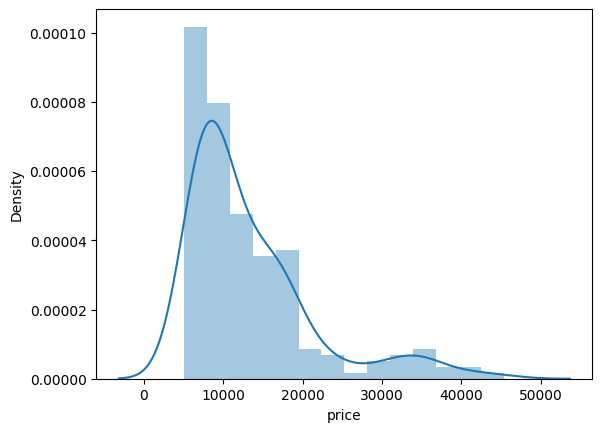

In [44]:
sns.distplot(df['price'])

##### Here most of the datas are rightly skewed and most of the prices are very low.

Text(0.5, 1.0, 'Car Price')

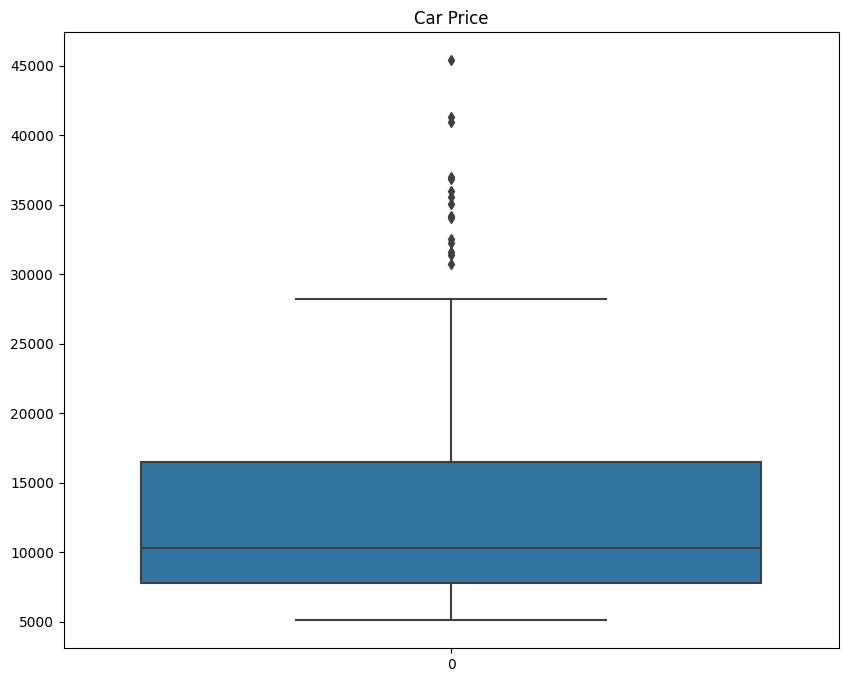

In [45]:
# box plot for price

plt.figure(figsize = (10,8))
sns.boxplot(data = df['price'])

plt.title('Car Price')

In [46]:
df.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [47]:
df.price.median()

10295.0

In [48]:
Q1 = df.price.quantile(0.25)

Q1

7788.0

In [49]:
Q3 = df.price.quantile(0.75)

Q3

16503.0

In [50]:
IQR = Q3 - Q1

IQR

8715.0

In [51]:
lower_bound = Q1 - 1.5 * IQR

lower_bound

-5284.5

In [52]:
upper_bound = Q3 + 1.5 * IQR

upper_bound 

29575.5

#### From the analysis its clear that the datapoint below lower_bound and above upper bonud are the outliers

In [53]:
df_outlier = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

df_outlier

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
15,16,0,bmw x4,gas,std,4,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.0
16,17,0,bmw x5,gas,std,2,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
17,18,0,bmw x3,gas,std,4,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0
47,48,0,jaguar xj,gas,std,4,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0
48,49,0,jaguar xf,gas,std,4,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0
49,50,0,jaguar xk,gas,std,2,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0
70,71,-1,buick skyhawk,diesel,turbo,4,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123,4350,22,25,31600.0
71,72,-1,buick opel isuzu deluxe,gas,std,4,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0
72,73,3,buick skylark,gas,std,2,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,35056.0
73,74,0,buick century special,gas,std,4,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0


In [54]:
df_no_outlier = df[(df['price'] > lower_bound) & (df['price'] < upper_bound)]

df_no_outlier

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,4,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,4,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Data Encoding
        Encoding categorical data using label encoding

In [55]:
# Filter the columns with non-numeric data types
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Print the list of categorical fields
print("Categorical Fields:")
categorical_columns

Categorical Fields:


Index(['CarName', 'fueltype', 'aspiration', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'fuelsystem'],
      dtype='object')

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
label_encoder = LabelEncoder()

label_encoder

LabelEncoder()

In [58]:
df['fueltype'] = label_encoder.fit_transform(df.fueltype)
df['fueltype']

0      1
1      1
2      1
3      1
4      1
      ..
200    1
201    1
202    1
203    0
204    1
Name: fueltype, Length: 205, dtype: int64

In [59]:
df['aspiration'] = label_encoder.fit_transform(df.aspiration)
df['aspiration']

0      0
1      0
2      0
3      0
4      0
      ..
200    0
201    1
202    0
203    1
204    1
Name: aspiration, Length: 205, dtype: int64

In [60]:
df['carbody'] = label_encoder.fit_transform(df.carbody)
df['carbody']

0      0
1      0
2      2
3      3
4      3
      ..
200    3
201    3
202    3
203    3
204    3
Name: carbody, Length: 205, dtype: int64

In [61]:
df['drivewheel'] = label_encoder.fit_transform(df.drivewheel)
df['drivewheel']

0      2
1      2
2      2
3      1
4      0
      ..
200    2
201    2
202    2
203    2
204    2
Name: drivewheel, Length: 205, dtype: int64

In [62]:
df['enginelocation'] = label_encoder.fit_transform(df.enginelocation)
df['enginelocation']

0      0
1      0
2      0
3      0
4      0
      ..
200    0
201    0
202    0
203    0
204    0
Name: enginelocation, Length: 205, dtype: int64

In [63]:
df['enginetype'] = label_encoder.fit_transform(df.enginetype)
df['enginetype']

0      0
1      0
2      5
3      3
4      3
      ..
200    3
201    3
202    5
203    3
204    3
Name: enginetype, Length: 205, dtype: int64

In [64]:
df['fuelsystem'] = label_encoder.fit_transform(df.fuelsystem)
df['fuelsystem']

0      5
1      5
2      5
3      5
4      5
      ..
200    5
201    5
202    5
203    3
204    5
Name: fuelsystem, Length: 205, dtype: int64

In [65]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,2,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,4,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,4,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),1,0,4,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,1,1,4,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,1,0,4,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,0,1,4,3,2,0,109.1,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [66]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,2,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,4,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,4,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int64  
 7   drivewheel        205 non-null    int64  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int64  
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

#### Correlation between Price and variables

In [68]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,2,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,4,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,4,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),1,0,4,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,1,1,4,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,1,0,4,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,0,1,4,3,2,0,109.1,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


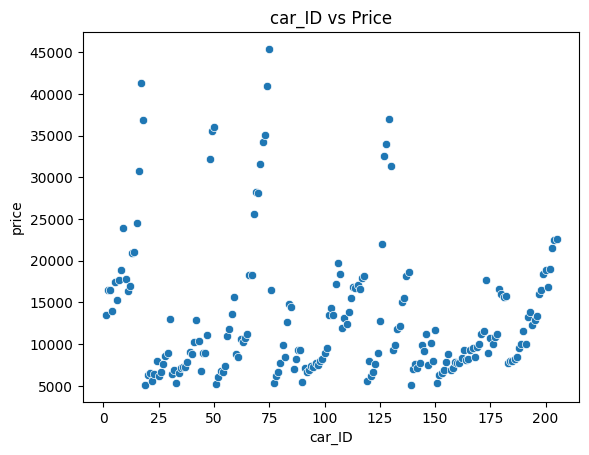

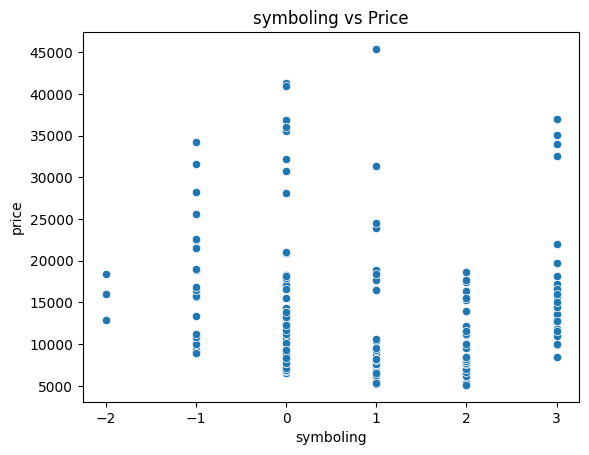

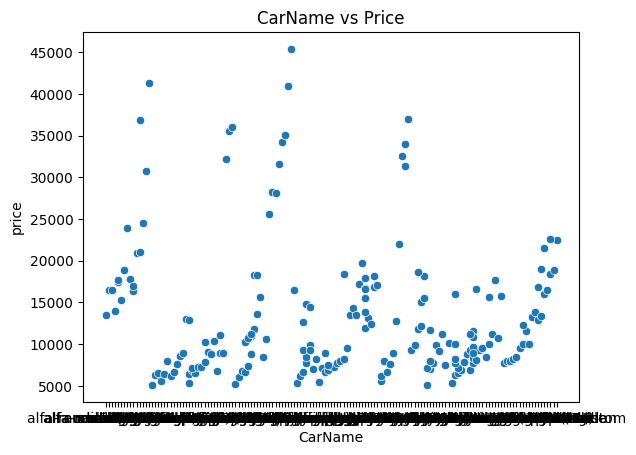

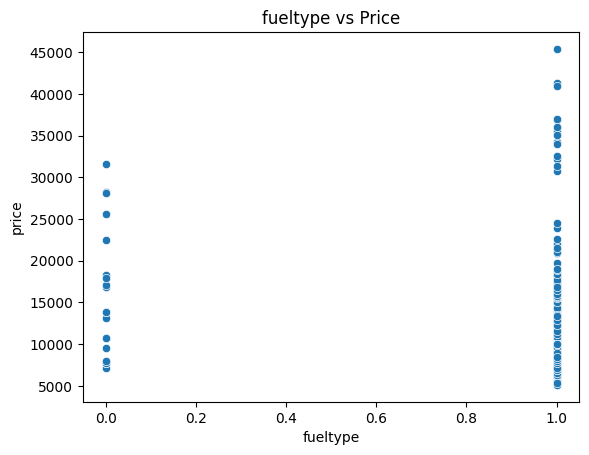

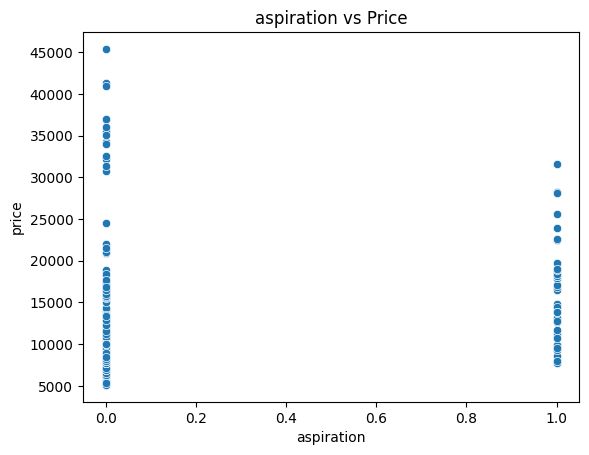

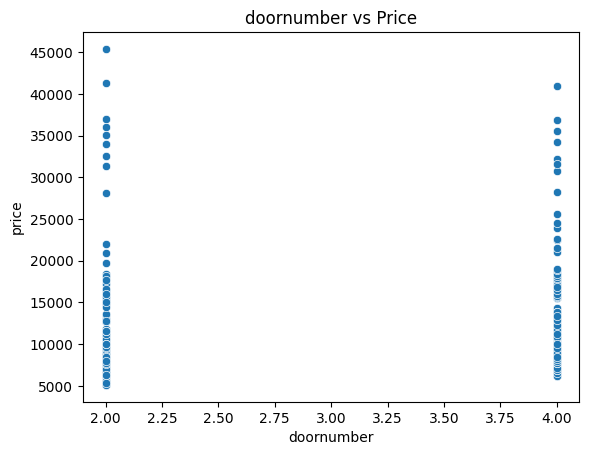

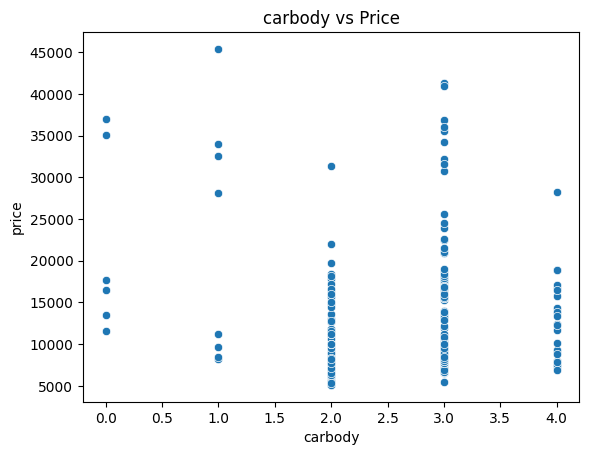

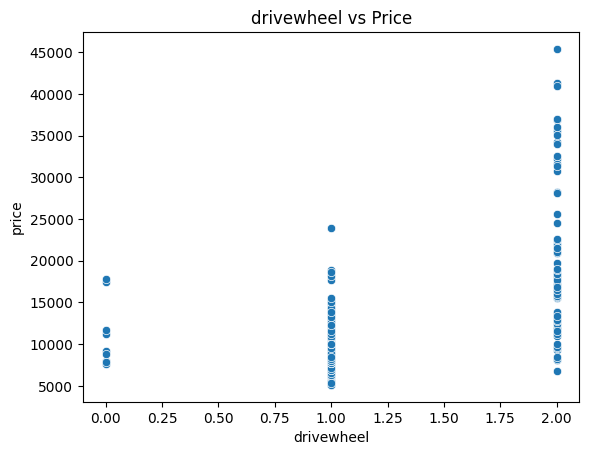

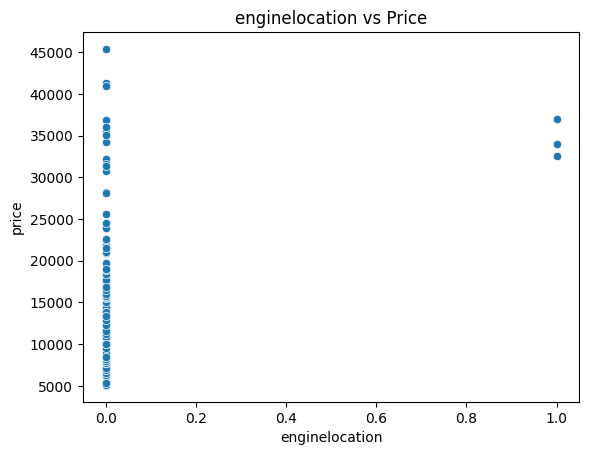

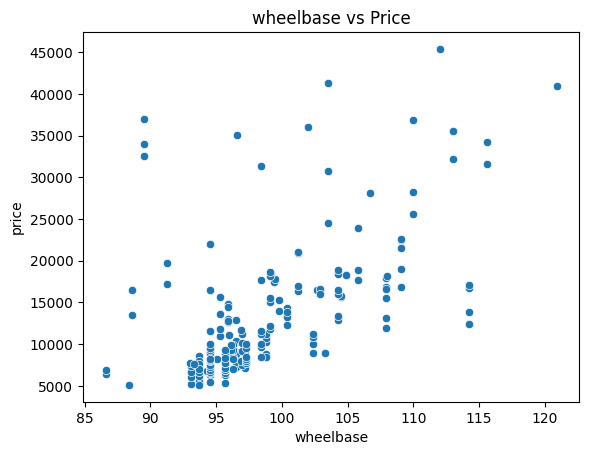

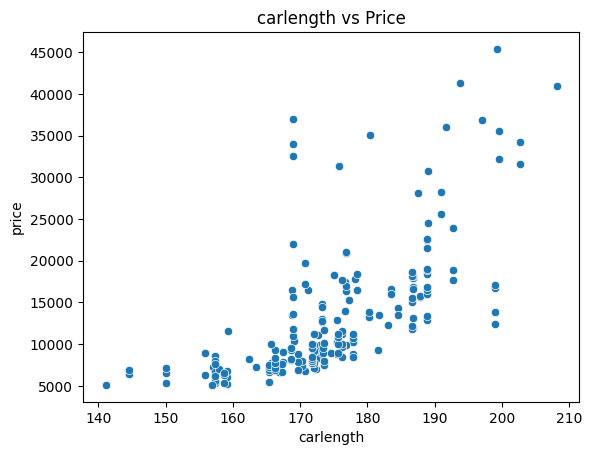

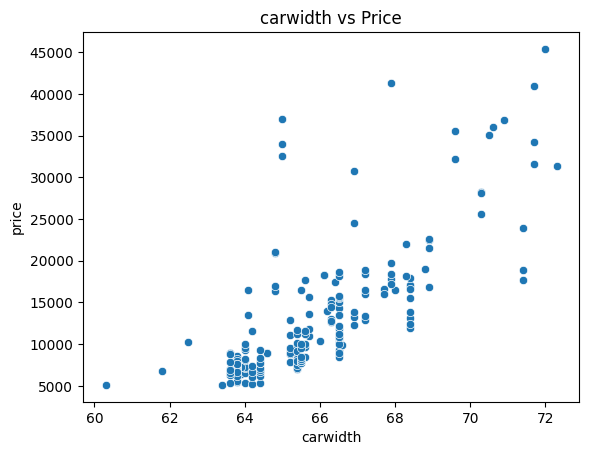

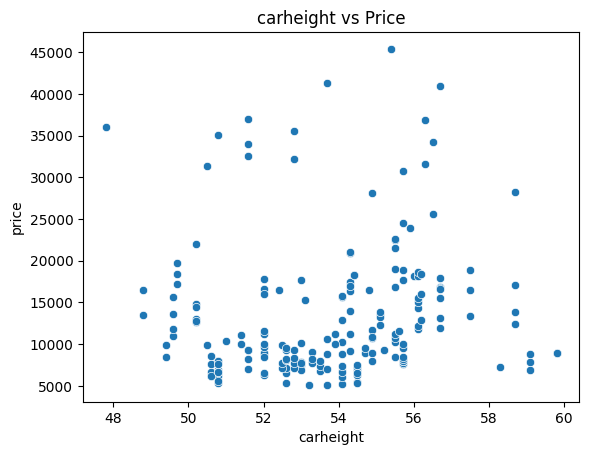

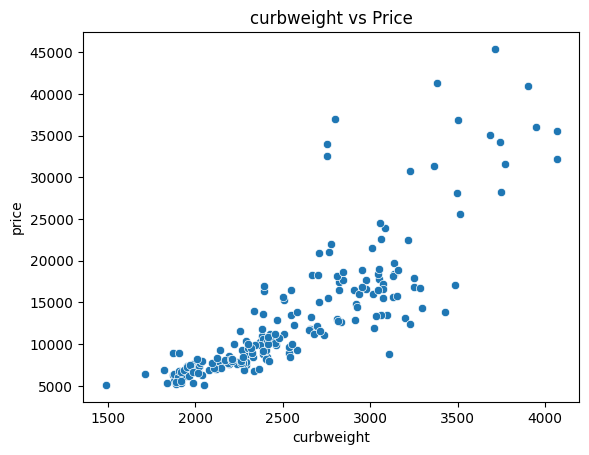

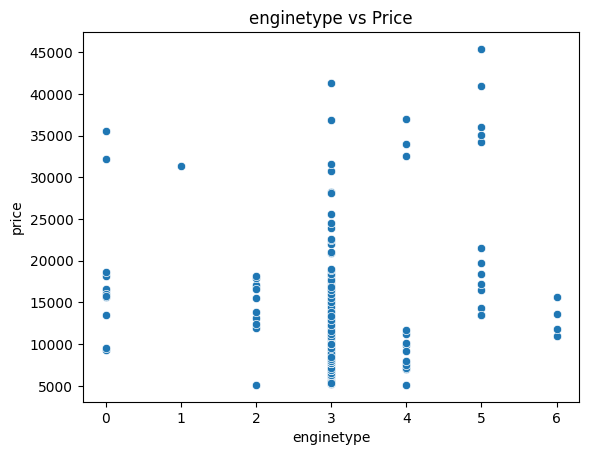

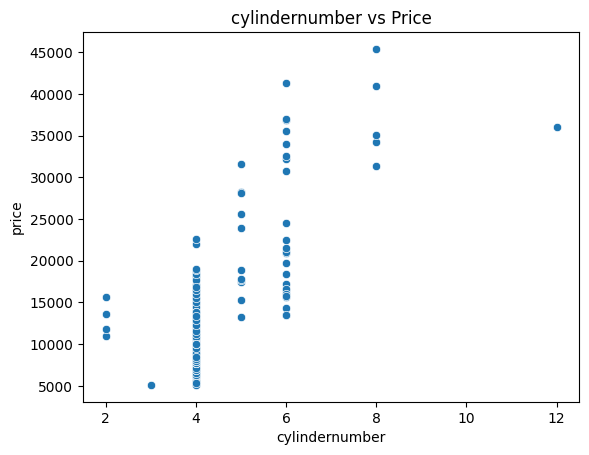

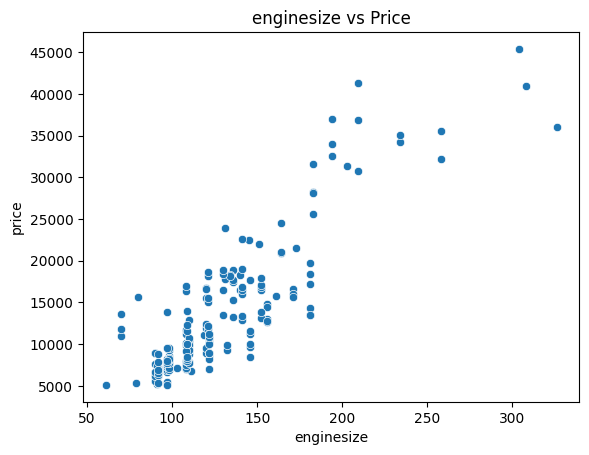

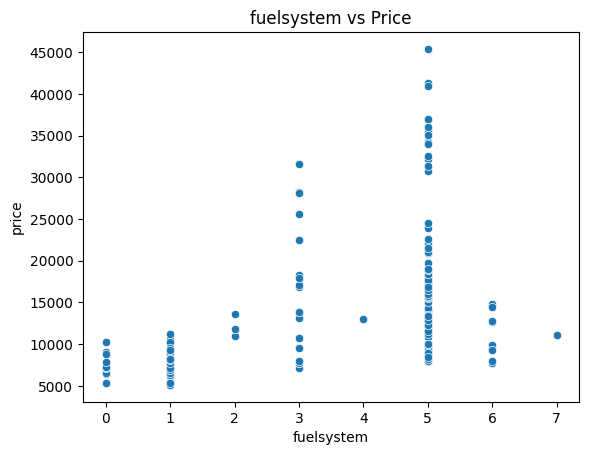

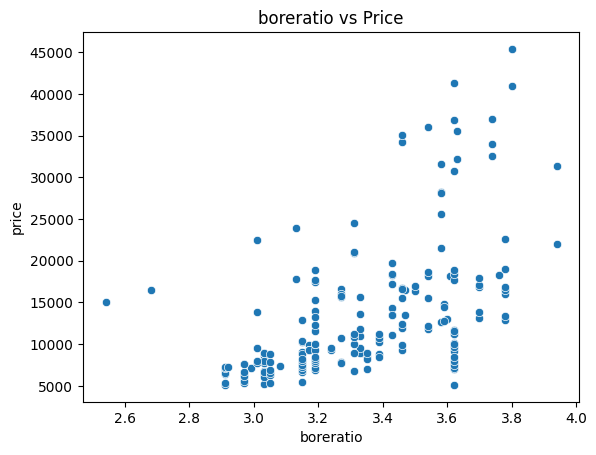

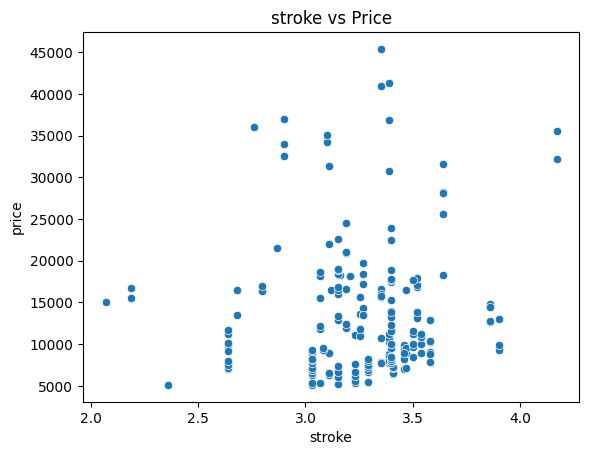

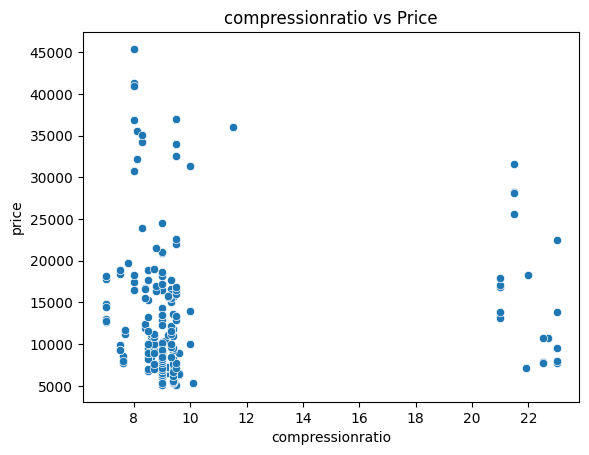

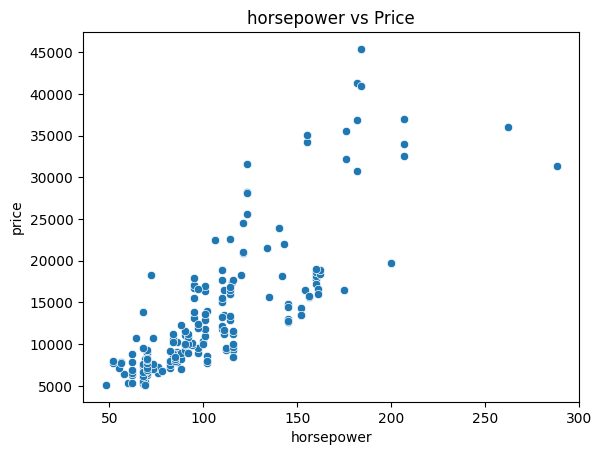

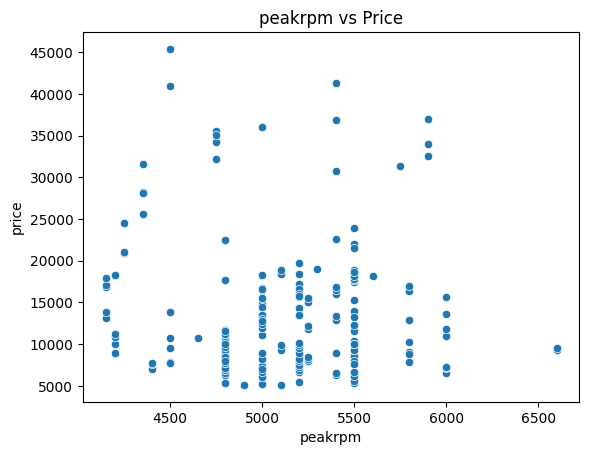

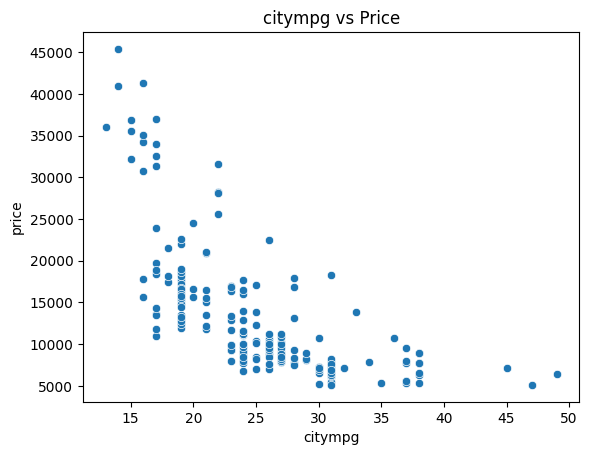

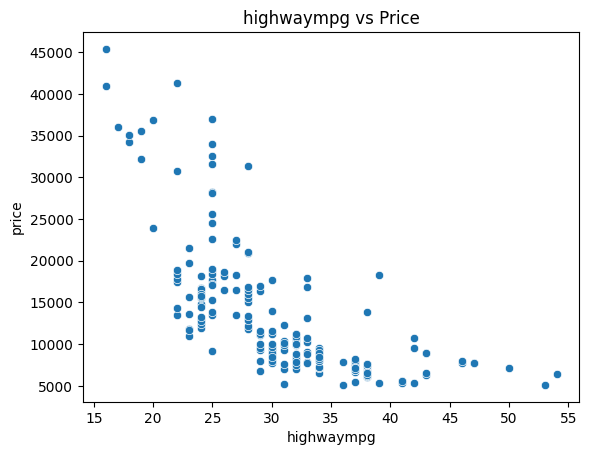

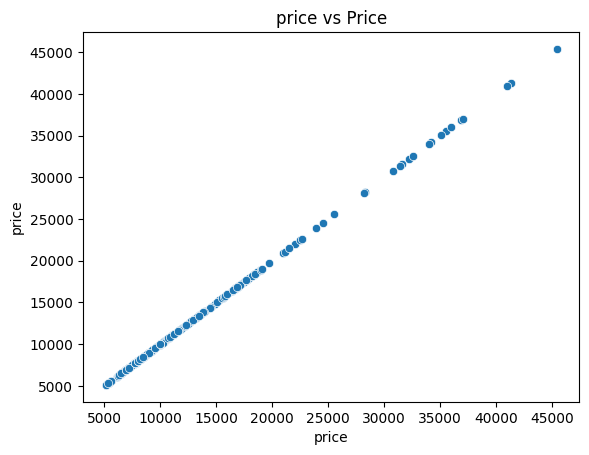

In [69]:
for i in df:
    sns.scatterplot(data = df, x = i, y = 'price')
    plt.title(i + ' vs Price')
    plt.show()

In [70]:
df.drop('CarName', axis = 1, inplace = True)

### Heat Map 

In [71]:
# Create a correlation matrix between numerical columns
corr_matrix = df.corr()

In [72]:
corr_matrix

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,-0.125568,0.067729,0.190352,0.098303,0.051406,0.051483,0.129729,0.170636,...,-0.033930,0.204898,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,0.194311,-0.059866,-0.664073,-0.596135,-0.041671,0.212471,-0.531954,-0.357612,...,-0.105790,0.091163,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
fueltype,-0.125568,0.194311,1.000000,-0.401397,-0.191491,-0.147853,-0.132257,0.040070,-0.308346,-0.212679,...,-0.069594,0.041529,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679
aspiration,0.067729,-0.059866,-0.401397,1.000000,0.031792,0.063028,0.066465,-0.057191,0.257611,0.234539,...,0.108217,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,0.190352,-0.664073,-0.191491,0.031792,1.000000,0.680358,-0.098954,-0.137757,0.447357,0.398568,...,0.020742,-0.015519,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
carbody,0.098303,-0.596135,-0.147853,0.063028,0.680358,1.000000,-0.155745,-0.277009,0.401362,0.334433,...,-0.073352,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976
drivewheel,0.051406,-0.041671,-0.132257,0.066465,-0.098954,-0.155745,1.000000,0.147865,0.459745,0.485649,...,0.524307,0.424686,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220,0.577992
enginelocation,0.051483,0.212471,0.040070,-0.057191,-0.137757,-0.277009,0.147865,1.000000,-0.187790,-0.050989,...,0.196826,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,0.129729,-0.531954,-0.308346,0.257611,0.447357,0.401362,0.459745,-0.187790,1.000000,0.874587,...,0.569329,0.384601,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,-0.212679,0.234539,0.398568,0.334433,0.485649,-0.050989,0.874587,1.000000,...,0.683360,0.557810,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920


<Axes: >

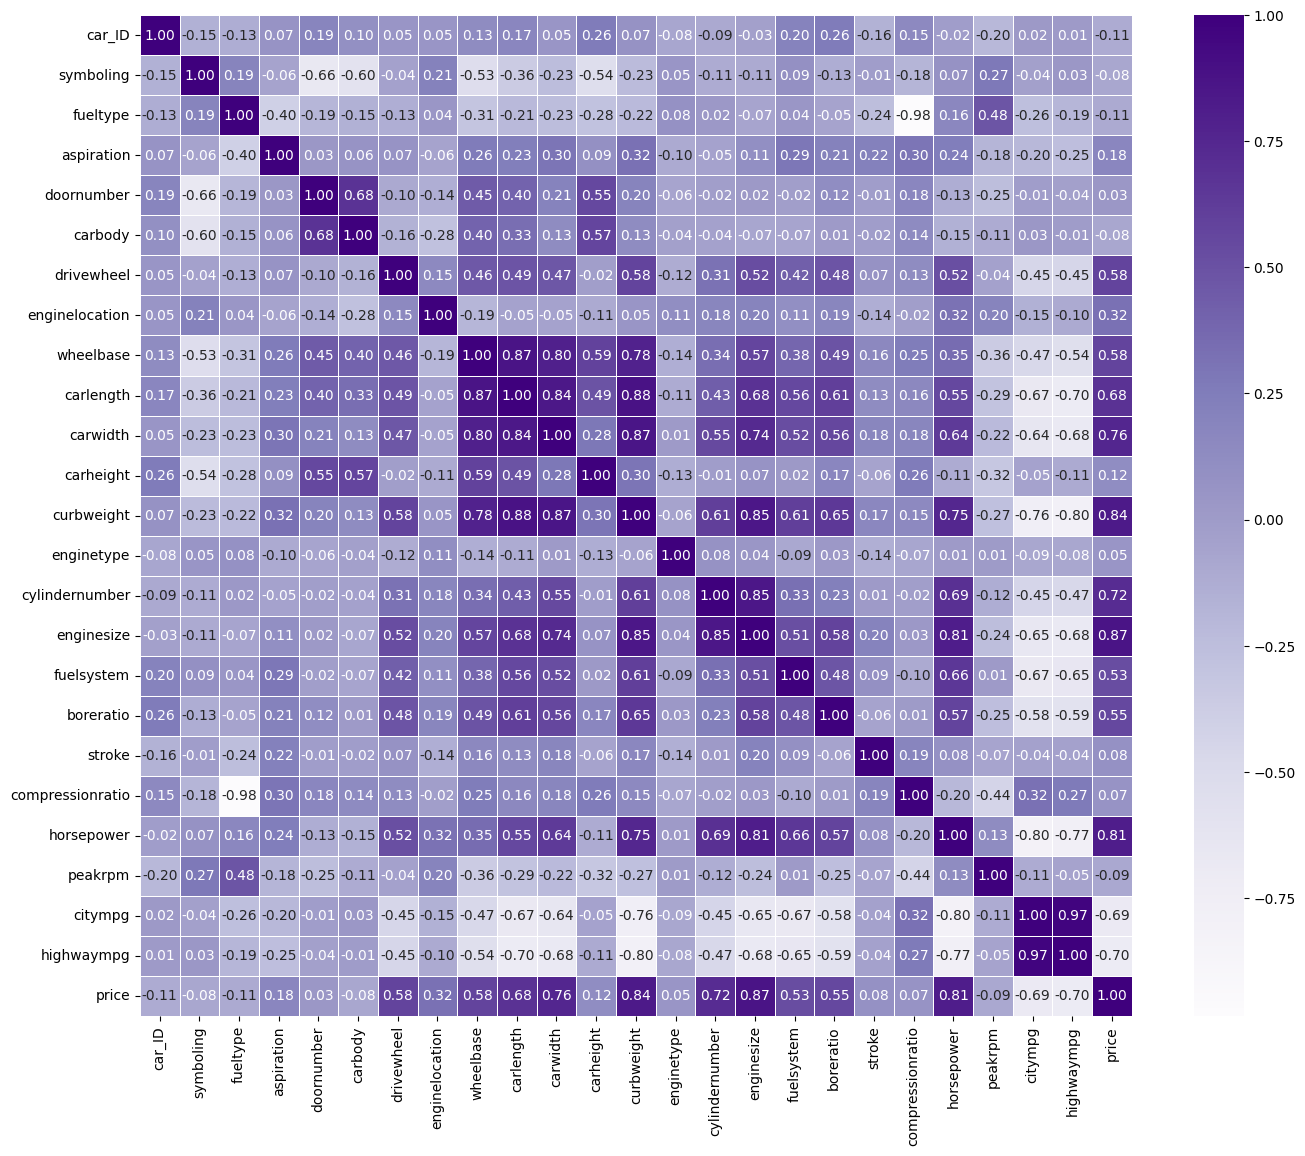

In [73]:
#Plot heatmap

plt.figure(figsize = (16,13))
sns.heatmap(corr_matrix, annot = True, cmap = 'Purples', fmt = '.2f', linewidths = .5)

#### Heat map shows the correlation between each variables.
    1. Positive correlation between
            * drivewheel (0.58)
            * wheelbase (0.58)
            * carlength (0.68)
            * carwidth (0.76)
            * curbweight (0.84)
            * cylindernumber (0.72)
            * enginesize (0.87)
            * fuelsystem (0.53)
            * boreratio (0.55)
            * horsepower(.81)
    2. Negative correlation between
            * citympg (-0,69)
            * highwaympg (-0.70)

#### Dataset splitting

In [82]:
# Specify the independent and dependent variable
df_selected_variable = df[['drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'horsepower', 'citympg', 'highwaympg', 'price']]


X = df_selected_variable.drop(['price'], axis = 1)

y = df_selected_variable[['price']]

In [83]:
X

,drivewheel,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg
0,2,88.6,168.8,64.1,2548,4,130,5,3.47,111,21,27
1,2,88.6,168.8,64.1,2548,4,130,5,3.47,111,21,27
2,2,94.5,171.2,65.5,2823,6,152,5,2.68,154,19,26
3,1,99.8,176.6,66.2,2337,4,109,5,3.19,102,24,30
4,0,99.4,176.6,66.4,2824,5,136,5,3.19,115,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...
200,2,109.1,188.8,68.9,2952,4,141,5,3.78,114,23,28
201,2,109.1,188.8,68.8,3049,4,141,5,3.78,160,19,25
202,2,109.1,188.8,68.9,3012,6,173,5,3.58,134,18,23
203,2,109.1,188.8,68.9,3217,6,145,3,3.01,106,26,27


In [84]:
y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


### Feature Scaling

In [85]:
# Import Libraries

from sklearn.preprocessing import MinMaxScaler

In [86]:
# Create an object for minmax scaler
scaler = MinMaxScaler()

scaler

MinMaxScaler()

In [87]:
X_scaled = scaler.fit_transform(X)

X_scaled

array([[1.        , 0.05830904, 0.41343284, ..., 0.2625    , 0.22222222,
        0.28947368],
       [1.        , 0.05830904, 0.41343284, ..., 0.2625    , 0.22222222,
        0.28947368],
       [1.        , 0.2303207 , 0.44925373, ..., 0.44166667, 0.16666667,
        0.26315789],
       ...,
       [1.        , 0.65597668, 0.7119403 , ..., 0.35833333, 0.13888889,
        0.18421053],
       [1.        , 0.65597668, 0.7119403 , ..., 0.24166667, 0.36111111,
        0.28947368],
       [1.        , 0.65597668, 0.7119403 , ..., 0.275     , 0.16666667,
        0.23684211]])

In [89]:
y_scaled = scaler.fit_transform(y)

y_scaled

array([[2.07958890e-01],
       [2.82557966e-01],
       [2.82557966e-01],
       [2.19254257e-01],
       [3.06141701e-01],
       [2.51526737e-01],
       [3.12596197e-01],
       [3.42634427e-01],
       [4.65642222e-01],
       [3.16299265e-01],
       [2.80820217e-01],
       [2.93108584e-01],
       [3.93525644e-01],
       [3.96877017e-01],
       [4.82771461e-01],
       [6.36562236e-01],
       [8.98589941e-01],
       [7.88491137e-01],
       [8.19224468e-04],
       [2.92190060e-02],
       [3.61700015e-02],
       [1.12705427e-02],
       [3.12546547e-02],
       [7.04781292e-02],
       [2.75805571e-02],
       [3.90745246e-02],
       [6.18390348e-02],
       [8.53979445e-02],
       [9.44094136e-02],
       [1.94776823e-01],
       [3.37868030e-02],
       [4.31209970e-02],
       [6.97582047e-03],
       [3.50280522e-02],
       [4.99230426e-02],
       [5.40439899e-02],
       [5.40439899e-02],
       [6.89389802e-02],
       [9.87289608e-02],
       [9.25227149e-02],


In [90]:
from sklearn.model_selection import train_test_split

In [94]:
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 42)



X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25, random_state = 42)

In [95]:
X_train

array([[0.5       , 0.2303207 , 0.36119403, ..., 0.02916667, 0.88888889,
        0.89473684],
       [0.5       , 0.4606414 , 0.51492537, ..., 0.18333333, 0.44444444,
        0.47368421],
       [0.5       , 0.2303207 , 0.43432836, ..., 0.0875    , 0.5       ,
        0.55263158],
       ...,
       [0.5       , 0.2303207 , 0.36119403, ..., 0.0875    , 0.5       ,
        0.55263158],
       [1.        , 0.47521866, 0.63283582, ..., 0.47083333, 0.16666667,
        0.21052632],
       [0.5       , 0.40233236, 0.64925373, ..., 0.43333333, 0.11111111,
        0.15789474]])

In [96]:
X_test

array([[1.        , 0.49271137, 0.71492537, 0.55      , 0.67571761,
        0.4       , 0.55849057, 0.71428571, 0.77142857, 0.55833333,
        0.08333333, 0.15789474],
       [0.        , 0.37609329, 0.55373134, 0.63333333, 0.60705974,
        0.3       , 0.26415094, 0.71428571, 0.42142857, 0.46666667,
        0.08333333, 0.15789474],
       [0.5       , 0.3090379 , 0.48208955, 0.40833333, 0.31574864,
        0.2       , 0.22264151, 0.14285714, 0.56428571, 0.20416667,
        0.38888889, 0.47368421],
       [0.5       , 0.36443149, 0.67910448, 0.51666667, 0.45384019,
        0.2       , 0.22641509, 0.71428571, 0.71428571, 0.25833333,
        0.22222222, 0.31578947],
       [1.        , 0.68221574, 0.74328358, 0.83333333, 0.87742436,
        0.3       , 0.46037736, 0.42857143, 0.74285714, 0.3125    ,
        0.25      , 0.23684211],
       [0.5       , 0.2303207 , 0.36567164, 0.29166667, 0.2094647 ,
        0.2       , 0.13584906, 0.14285714, 0.43571429, 0.0875    ,
        0.5       ,

In [97]:
y_train

array([[0.04917829],
       [0.09507969],
       [0.05538454],
       [0.25152674],
       [0.08269202],
       [0.16699767],
       [0.79216524],
       [0.00672757],
       [0.10215481],
       [0.29991063],
       [0.15217715],
       [0.28263244],
       [0.13852341],
       [0.043121  ],
       [0.39352564],
       [0.05404399],
       [0.41954223],
       [0.12976019],
       [0.04518147],
       [0.32351919],
       [0.06169008],
       [0.02425401],
       [0.28739884],
       [0.10972643],
       [0.19430515],
       [0.18981183],
       [0.03850355],
       [0.07047813],
       [0.06183903],
       [0.33518693],
       [0.29112259],
       [0.32351919],
       [0.28255797],
       [0.02658756],
       [0.14721215],
       [0.06183903],
       [0.71769028],
       [0.04644754],
       [0.        ],
       [0.05404399],
       [0.29683233],
       [0.13596644],
       [0.03125465],
       [0.25798123],
       [0.21664763],
       [0.03502805],
       [0.29310858],
       [0.343

In [98]:
y_test

array([[6.36562236e-01],
       [3.16299265e-01],
       [1.09999504e-01],
       [1.67121791e-01],
       [5.74201877e-01],
       [6.65557817e-02],
       [6.62827069e-02],
       [1.02775433e-01],
       [1.26110918e-01],
       [6.59599821e-02],
       [2.02993893e-01],
       [7.74539497e-02],
       [3.26746438e-01],
       [1.20897671e-01],
       [8.89777072e-01],
       [3.40102279e-02],
       [8.19224468e-04],
       [1.86460454e-01],
       [7.62375254e-02],
       [1.20202572e-01],
       [8.38339705e-02],
       [2.08058190e-01],
       [7.77270245e-02],
       [3.37868030e-02],
       [3.90745246e-02],
       [8.98589941e-01],
       [1.12233752e-01],
       [2.05972891e-01],
       [7.15207785e-02],
       [1.94181024e-01],
       [5.07273720e-01],
       [2.75805571e-02],
       [6.90134551e-02],
       [4.06310511e-01],
       [6.38250335e-02],
       [5.72414478e-01],
       [1.52450226e-01],
       [1.44655181e-01],
       [9.42977012e-02],
       [2.32634924e-01],


### Linear Regression

In [99]:
# import libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [100]:
# Create an object for linear regression

linear_regression = LinearRegression()

In [101]:
linear_regression

LinearRegression()

In [102]:
linear_regression.fit(X_train, y_train)

LinearRegression()

In [103]:
# Predict the value

print("Predicted value is : ")
y_predict = linear_regression.predict(X_test)

y_predict

Predicted value is : 


array([[ 0.51988416],
       [ 0.30079033],
       [ 0.1505325 ],
       [ 0.19428956],
       [ 0.46840875],
       [ 0.03648809],
       [ 0.02767025],
       [ 0.06010173],
       [ 0.11375406],
       [ 0.02586243],
       [ 0.2494198 ],
       [ 0.08846814],
       [ 0.26378281],
       [ 0.15913063],
       [ 0.81976295],
       [ 0.01431105],
       [-0.17256395],
       [ 0.31256083],
       [ 0.15650045],
       [ 0.10776257],
       [ 0.16811056],
       [ 0.39064167],
       [ 0.03542904],
       [-0.02431698],
       [ 0.024283  ],
       [ 0.5424496 ],
       [ 0.25733887],
       [ 0.28255248],
       [ 0.03673934],
       [ 0.27941078],
       [ 0.46235711],
       [ 0.02371647],
       [ 0.00196742],
       [ 0.41601427],
       [ 0.08386568],
       [ 0.46474527],
       [ 0.10503611],
       [ 0.12869159],
       [ 0.00186138],
       [ 0.31467355],
       [ 0.10676466],
       [ 0.18042717],
       [ 0.25906875],
       [ 0.02288436],
       [ 0.03501898],
       [ 0

### Regression plot

In [104]:
y_test.shape


(52, 1)

In [105]:
y_predict.shape

(52, 1)

In [298]:
# Create a dataframe for creating the regression plot

y_pred = pd.DataFrame(
{
    'Actual Price' : y_test.values,
    'Predicted Price' : y_predict
})

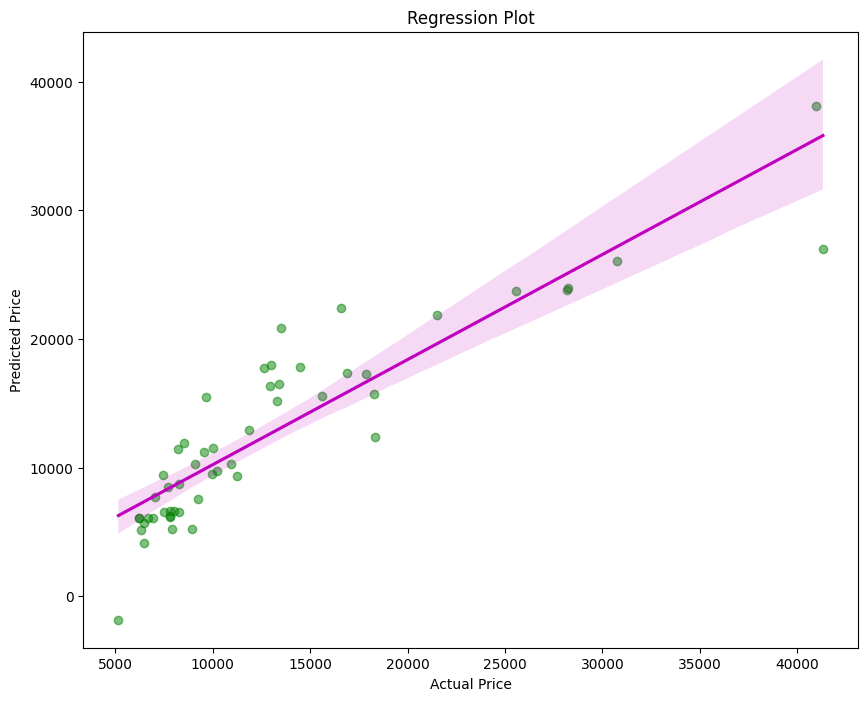

In [302]:
#Plot the Regression plot

plt.figure(figsize = (10,8))
sns.regplot(x = 'Actual Price', y = 'Predicted Price', data = y_pred, scatter_kws = {'alpha' : 0.5, 'color' : 'g'}, line_kws = {'color' :'m'})

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Regression Plot')
plt.show()

#### Mean Squared Error (MSE)

In [106]:
from sklearn.metrics import mean_squared_error

In [107]:
print("Mean Squared Error : ")
mse = mean_squared_error(y_test,y_predict)

mse

Mean Squared Error : 


0.007840539024020642

Here the MSE value of 0.0078 suggests that the model's predictions have relatively low errors, and it performs well in terms of prediction accuracy.

#### R Squared

In [108]:
from sklearn.metrics import r2_score

In [109]:
print("R Squared : ")
rmse = mean_squared_error(y_test, y_predict, squared=False)

rmse

R Squared : 


0.08854681826028896

The R² value of 0.0885 is relatively low, indicating that the model is not capturing much of the variance in the target variable.

#### Cross Validation

In [110]:
from sklearn.model_selection import cross_val_score

In [111]:
# Perform cross-validation (5-fold cross-validation in this example)

cross_val_scores = cross_val_score(linear_regression, X_scaled, y_scaled, cv=5, scoring='neg_mean_squared_error')
cross_val_rmse = (-cross_val_scores.mean()) ** 0.5

print("Cross Validation RMSE:", cross_val_rmse)

Cross Validation RMSE: 0.1126073828249144


A lower Cross-Validation RMSE indicates that the model's predictions are more consistent and reliable on unseen data.